# EigenFaces

## 0. Mean face

/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys
/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


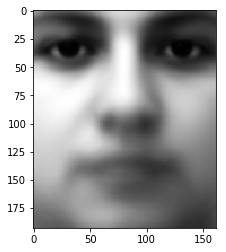

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.misc import imread
from scipy.misc import imresize

img1 = imread('data/1a.jpg')
xlen = img1.shape[0]
ylen = img1.shape[1]

data_a = np.zeros([200, xlen*ylen])
data_b = np.zeros([200, xlen*ylen])
for i in range(200):
    image = imread('data/'+str(i+1)+'a.jpg')
    image_flat = np.ndarray.flatten(image)
    data_a[i] = image_flat
    image = imread('data/'+str(i+1)+'b.jpg')
    image_flat = np.ndarray.flatten(image)
    data_b[i] = image_flat

traindata_a = data_a[:190]
mean_face = traindata_a.mean(0)

plt.imshow(np.reshape(mean_face, [xlen,ylen]), cmap='gray')
plt.show()

## 1. Applying Eigen faces (neutral face, person in training data)

In [3]:
phi = np.matrix(traindata_a - mean_face)
#C = phi * phi.T
#print(C.shape)

In [4]:
u,s,vh = scipy.linalg.svd(phi)
#u,s,vh = scipy.linalg.svd(C)

In [5]:
#eigval2, eigvec2 = np.linalg.eig(phi.T * phi) # 30000x30000

In [6]:
eigval3, eigvec3 = np.linalg.eig(phi * phi.T) # 190x190

In [7]:
X = phi
U = np.matrix(X).T * eigvec3
tmp_sq = np.multiply(U, U)
tmp_norm = np.sqrt(tmp_sq.sum(axis=0))
U = U/tmp_norm

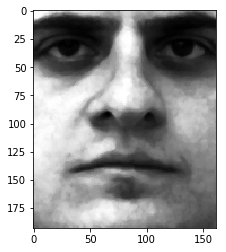

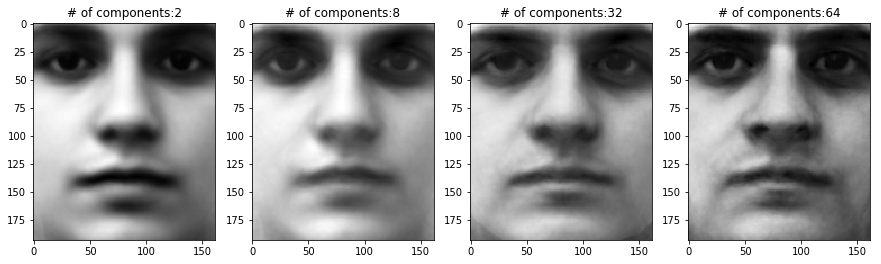

In [8]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
x_sample_a = data_a[0]
plt.imshow(np.reshape(x_sample_a, [xlen,ylen]), cmap='gray')
plt.show()

plt.rcParams['figure.figsize'] = (15.0, 15.0)
n_components = [2, 8, 32, 64]
#eigvec = np.matrix(vh.T)
for c in range(len(n_components)):
    n_component = n_components[c]
    #A = eigvec3[:,:n_component].real
    #y = (A * np.linalg.pinv(A.conjugate().T*A) * A.conjugate().T) * np.matrix(x_sample_a - mean_face).T
    y = U[:,:n_component] * U[:,:n_component].T * np.matrix(x_sample_a - mean_face).T
    #u = np.matrix(u)
    #y = u[:,:n_component] * u[:,:n_component].T * np.matrix(x_sample_a - mean_face).T
    img_flat = y + np.matrix(mean_face).T
    plt.subplot(1, 4, c+1)
    plt.title('# of components:'+str(n_component))
    plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
plt.show()

## 2. Applying Eigen faces (smile face, person in training data)

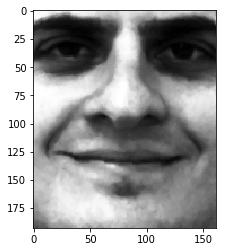

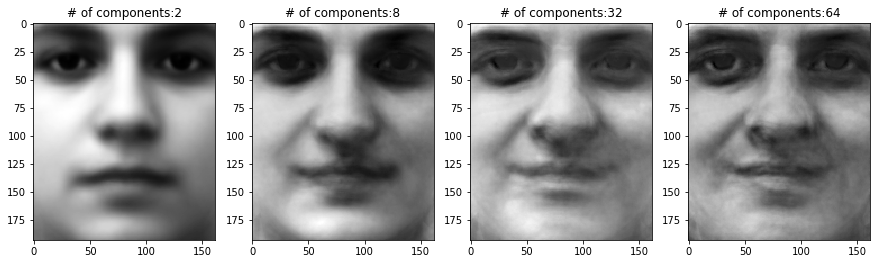

In [9]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
x_sample_a = data_b[0]
plt.imshow(np.reshape(x_sample_a, [xlen,ylen]), cmap='gray')
plt.show()

plt.rcParams['figure.figsize'] = (15.0, 15.0)
n_components = [2, 8, 32, 64]
#eigvec = np.matrix(vh.T)
for c in range(len(n_components)):
    n_component = n_components[c]
    #A = eigvec[:,:n_component]
    #A = eigvec2[:,:n_component].real
    y = U[:,:n_component] * U[:,:n_component].T * np.matrix(x_sample_a - mean_face).T
    #y = (A * np.linalg.pinv(A.T*A) * A.T) * np.matrix(x_sample_a - mean_face).T
    img_flat = y + np.matrix(mean_face).T
    plt.subplot(1, 4, c+1)
    plt.title('# of components:'+str(n_component))
    plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
plt.show()

## 3. Applying Eigen faces (neutral face, person not in training data)

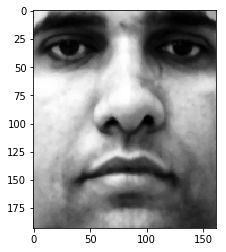

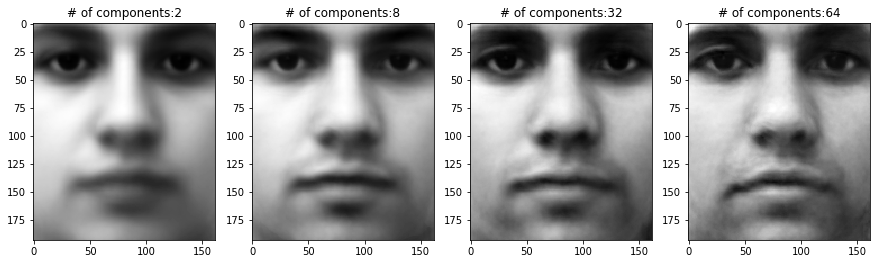

In [10]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
x_sample_a = data_a[190]
plt.imshow(np.reshape(x_sample_a, [xlen,ylen]), cmap='gray')
plt.show()

plt.rcParams['figure.figsize'] = (15.0, 15.0)
n_components = [2, 8, 32, 64]
#eigvec = np.matrix(vh.T)
for c in range(len(n_components)):
    n_component = n_components[c]
    #A = eigvec[:,:n_component]
    #y = (A * np.linalg.pinv(A.T*A) * A.T) * np.matrix(x_sample_a - mean_face).T
    y = U[:,:n_component] * U[:,:n_component].T * np.matrix(x_sample_a - mean_face).T
    img_flat = y + np.matrix(mean_face).T
    plt.subplot(1, 4, c+1)
    plt.title('# of components:'+str(n_component))
    plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
plt.show()

## 4. Applying Eigen faces (object image)

/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


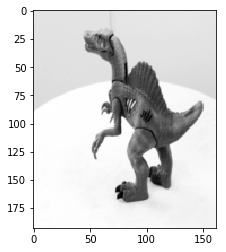

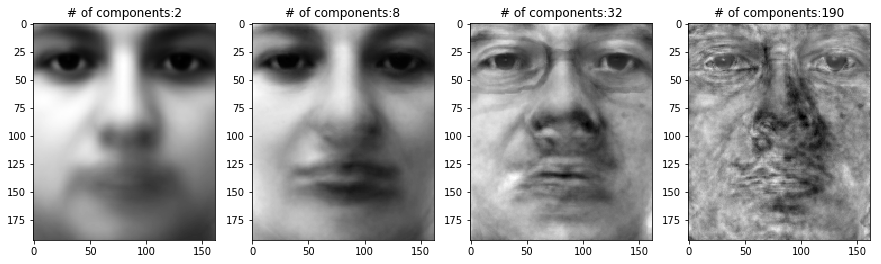

In [11]:
img2 = imread('dino0.png')
img2 = np.dot(img2[...,:3], [0.299, 0.587, 0.114])
img2 = imresize(img2, [xlen, ylen])
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(img2, cmap='gray')
plt.show()

#plt.rcParams['figure.figsize'] = (15.0, 15.0)
#x_sample_a = np.ndarray.flatten(img2) - mean_face
#y = vh.conjugate().T * np.matrix(x_sample_a).T
##n_components = [8, 32, 128, 512]
#n_components = [8, 2**8, 2**12, xlen*ylen]
#for c in range(len(n_components)):
#    n_component = n_components[c]
#    y_s = np.matrix([y[i,0] if i<n_component else 0 for i in range(y.shape[0])]).T
#    img_flat = vh * y_s + np.matrix(mean_face).T
#    plt.subplot(1, 4, c+1)
#    plt.title('# of components:'+str(n_component))
#    plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
#plt.show()

plt.rcParams['figure.figsize'] = (15.0, 15.0)
x_sample_a = np.ndarray.flatten(img2)
n_components = [2, 8, 32, 190]
#eigvec = np.matrix(vh.T)
for c in range(len(n_components)):
    n_component = n_components[c]
    #A = eigvec[:,:n_component]
    #y = (A * np.linalg.inv(A.T*A) * A.T) * np.matrix(x_sample_a - mean_face).T
    y = U[:,:n_component] * U[:,:n_component].T * np.matrix(x_sample_a - mean_face).T
    img_flat = y + np.matrix(mean_face).T
    plt.subplot(1, 4, c+1)
    plt.title('# of components:'+str(n_component))
    plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
plt.show()

## 5. Applying Eigen faces (neutral face, person in training data, rotated face)

/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/tensorflow_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


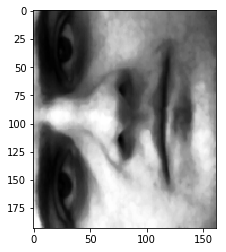

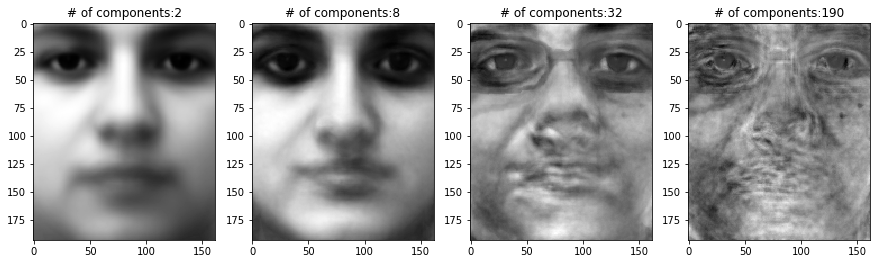

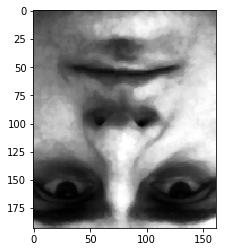

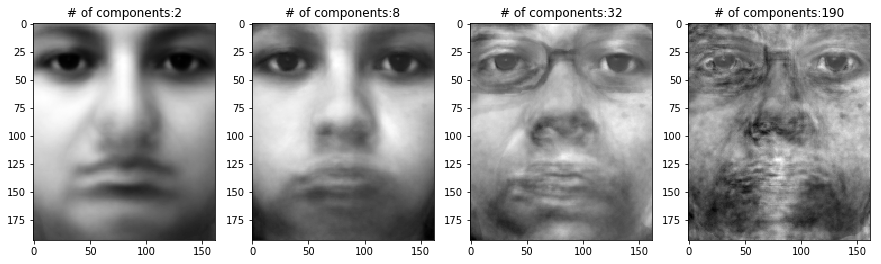

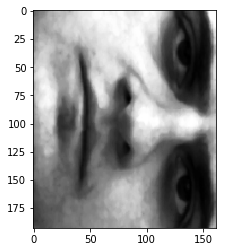

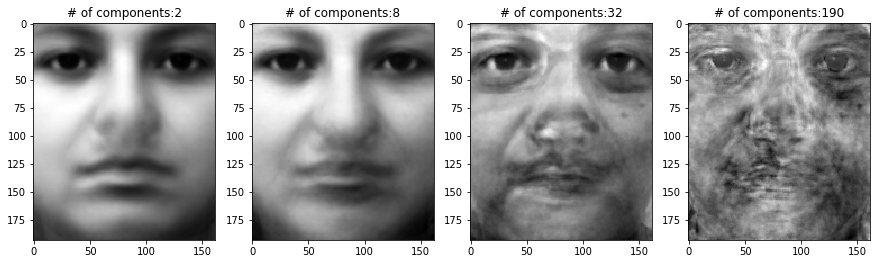

In [12]:
for rot in range(1,4):
    plt.rcParams['figure.figsize'] = (4.0, 4.0)
    img3 = imread('data/1a.jpg')
    img3 = np.rot90(img3, rot)
    img3 = imresize(img3, [xlen, ylen])
    plt.imshow(img3, cmap='gray')
    plt.show()
    
    #plt.rcParams['figure.figsize'] = (15.0, 15.0)
    #x_sample_a = np.ndarray.flatten(img3) - mean_face
    #y = vh.conjugate().T * np.matrix(x_sample_a).T
    ##n_components = [8, 32, 128, 512]
    ##n_components = [8, 128, 1024, 4096]
    #n_components = [8, 2**8, 2**12, xlen*ylen]
    #for c in range(len(n_components)):
    #    n_component = n_components[c]
    #    y_s = np.matrix([y[i,0] if i<n_component else 0 for i in range(y.shape[0])]).T
    #    img_flat = vh * y_s + np.matrix(mean_face).T
    #    plt.subplot(1, 4, c+1)
    #    plt.title('# of components:'+str(n_component))
    #    plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
    #plt.show()
    
    plt.rcParams['figure.figsize'] = (15.0, 15.0)
    x_sample_a = np.ndarray.flatten(img3)
    n_components = [2, 8, 32, 190]
    #eigvec = np.matrix(vh.T)
    for c in range(len(n_components)):
        n_component = n_components[c]
        #A = eigvec[:,:n_component]
        #y = (A * np.linalg.pinv(A.T*A) * A.T) * np.matrix(x_sample_a - mean_face).T
        y = U[:,:n_component] * U[:,:n_component].T * np.matrix(x_sample_a - mean_face).T
        img_flat = y + np.matrix(mean_face).T
        plt.subplot(1, 4, c+1)
        plt.title('# of components:'+str(n_component))
        plt.imshow(np.reshape(img_flat, [xlen,ylen]), cmap='gray')
    plt.show()
    